Drawn shape: Arc(0.272,-0.315, 0.427, 46,-78,False)


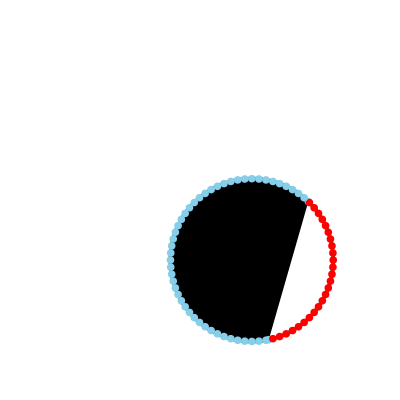

In [24]:
import drawSvg as draw
from hyperbolic import euclid, util
import math

def isPointOnSegment(arc,x,y):
    startDeg, endDeg = arc.startDeg % 360, arc.endDeg % 360
    if arc.cw:
        startDeg, endDeg = endDeg, startDeg
    else:
        startDeg, endDeg = startDeg, endDeg
    px = x - arc.cx
    py = y - arc.cy
    pDeg = math.degrees(math.atan2(py, px)) % 360
    if util.nearZero(pDeg - startDeg) or util.nearZero(pDeg - endDeg):
        return True
    if startDeg<endDeg: 
        return startDeg<=pDeg<=endDeg
    else:
        return (endDeg<=pDeg) ^ (pDeg<=startDeg)

start = 46
end = -78
cw = False

x, y, r = 0.27209, -0.3154, 0.4273
circle = euclid.shapes.Circle(x, y, r)
arc = euclid.shapes.Arc(x, y, r, start, end, cw=cw)
print('Drawn shape:', arc)

points = [
    arc.startPoint(),
    arc.endPoint(),
] + [
    (x + r*math.cos(math.radians(deg)),
     y + r*math.sin(math.radians(deg)))
    for deg in range(0, 360, 5)
]

d = draw.Drawing(2.1, 2.1, origin='center')

d.draw(circle, fill='none', stroke_width=0.02, stroke='green')
d.draw(arc, fill='black')
for x, y in points:
    # Blue only if on segment
    fill = 'skyblue' if isPointOnSegment(arc, x, y) else 'red'
    p = euclid.shapes.Circle(x, y, 0.02)
    d.draw(p, fill=fill)

d.setRenderSize(w=400)
d